# Final Project
#### CSC 21700 - Spring 2019
Alexandria Guo

For my project, I will be exploring the number of food recalls in America and how the number has changed between 2005 and 2018. Additionally, I will look at how the number of food recalls correlate to the number of food-related outbreaks in the corresponding years.

So in this project, I will attempt to answer the question: Does a higher number of food recalls lead to a lower number of food-related outbreaks? The null hypothesis would be: A higher number of recalls lead to a higher number of outbreaks.


The recall data that I will be using in my project are from the U.S. Department of Agriculture, located here: https://www.fsis.usda.gov/wps/portal/fsis/topics/recalls-and-public-health-alerts/recall-summaries. And the outbreak data that I will be using are from the Centers for Disease Control and Prevention, located here: https://wwwn.cdc.gov/norsdashboard/.

For convenience, number of outbreaks will encompass illness, hospospitalization, and deaths. And to make the datafiles simplier, I will combine all the recall data into one big file.

First, I will import the necessary packages and also download the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#recalls dataset
recalls = pd.read_csv('recall_summary.csv', encoding='ISO-8859-1')
recalls.head()

,Year,Month,Class,Pounds Recalled,Product,Problem Type,Unnamed: 6
0,2005,1,I,2520,Beef Filled Gyozas,Undeclared Allergen,NaN
1,2005,1,I,353533,Frozen Egg Rolls,Extraneous Material,NaN
2,2005,1,I,5760,Chicken Products,Listeria monocytogenes,NaN
3,2005,2,I,47,Ready-to-Eat Ham,Listeria monocytogenes,NaN
4,2005,2,I,123000,Ground Beef,Misbranding,NaN


In [3]:
#outbreaks dataset
outbreaks = pd.read_csv('outbreak.csv')
outbreaks.head()

,Year,Month,State,Illnesses,Hospitalizations,Deaths
0,1998,6,Washington,2,0.0,0.0
1,1998,8,Washington,2,0.0,0.0
2,1998,9,Vermont,4,0.0,0.0
3,1998,12,Vermont,33,0.0,0.0
4,1998,5,Virginia,8,0.0,0.0


Next, I will clean up the outbreaks and recalls data to only include relevant columns. For the outbreaks data, I will also combine the Illnesses, Hospitalization, and Deaths column into one Incident column for convenience.

In [4]:
recalls = recalls[["Year", "Month", "Pounds Recalled","Problem Type"]]
recalls.head()

,Year,Month,Pounds Recalled,Problem Type
0,2005,1,2520,Undeclared Allergen
1,2005,1,353533,Extraneous Material
2,2005,1,5760,Listeria monocytogenes
3,2005,2,47,Listeria monocytogenes
4,2005,2,123000,Misbranding


In [5]:
outbreaks["Incidents"] = outbreaks["Illnesses"] + outbreaks["Hospitalizations"] + outbreaks["Deaths"]
outbreaks = outbreaks[["Year", "Month", "State", "Incidents"]]
outbreaks = outbreaks.dropna().reset_index(drop=False)
outbreaks.head()

,index,Year,Month,State,Incidents
0,0,1998,6,Washington,2.0
1,1,1998,8,Washington,2.0
2,2,1998,9,Vermont,4.0
3,3,1998,12,Vermont,33.0
4,4,1998,5,Virginia,8.0


I will also download two datasets for recalls and outbreaks which have all the data combined by year for easy access. And one dataset with a merged version of the two datasets, which only include the years which both datasets have in common.

In [6]:
outbreak_totals = outbreaks.groupby('Year')['Incidents'].sum().reset_index(drop=False)
outbreak_totals.head()

,Year,Incidents
0,1998,28005.0
1,1999,25481.0
2,2000,26161.0
3,2001,25879.0
4,2002,25660.0


In [7]:
recall_totals = pd.read_csv('recall_totals.csv')
recall_totals.head()

,Year,Total Recalls,Pounds Recalled
0,2005,52,6446231
1,2006,34,5947933
2,2007,58,143063822
3,2008,52,154726663
4,2009,68,9488664


In [8]:
merged_totals = pd.read_csv('merge_summary.csv')
merged_totals.head()

,Year,Total Recalls,Pounds Recalled,Total Incidents
0,2005,52,6446231,20509
1,2006,34,5947933,30060
2,2007,58,143063822,22213
3,2008,52,154726663,24315
4,2009,68,9488664,14350


## Exploratory Analysis
First, I will explore the overall change of outbreaks by year and overall change of recall by year.

Text(0.5, 0.92, 'Outbreaks per Year')

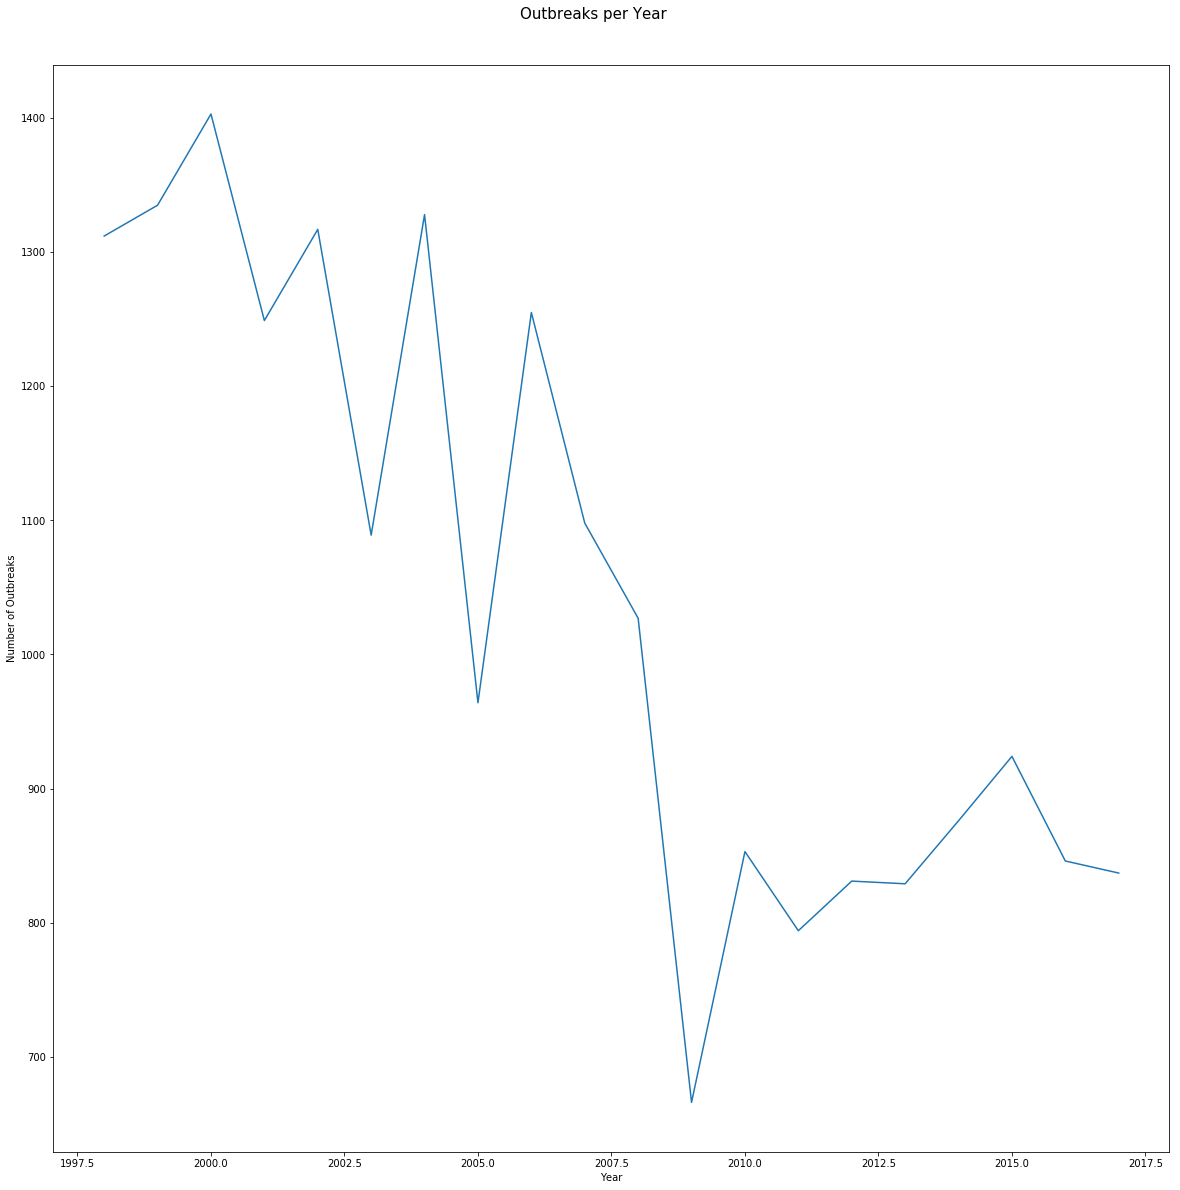

In [9]:
fig = plt.figure(figsize=(20,20))
df = outbreaks.groupby('Year')['Month'].count().reset_index()
df.columns = ['Year', 'Counts']
plt.plot(df['Year'], df['Counts'])
plt.xlabel('Year')
plt.ylabel('Number of Outbreaks')
plt.suptitle('Outbreaks per Year', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Recalls per Year')

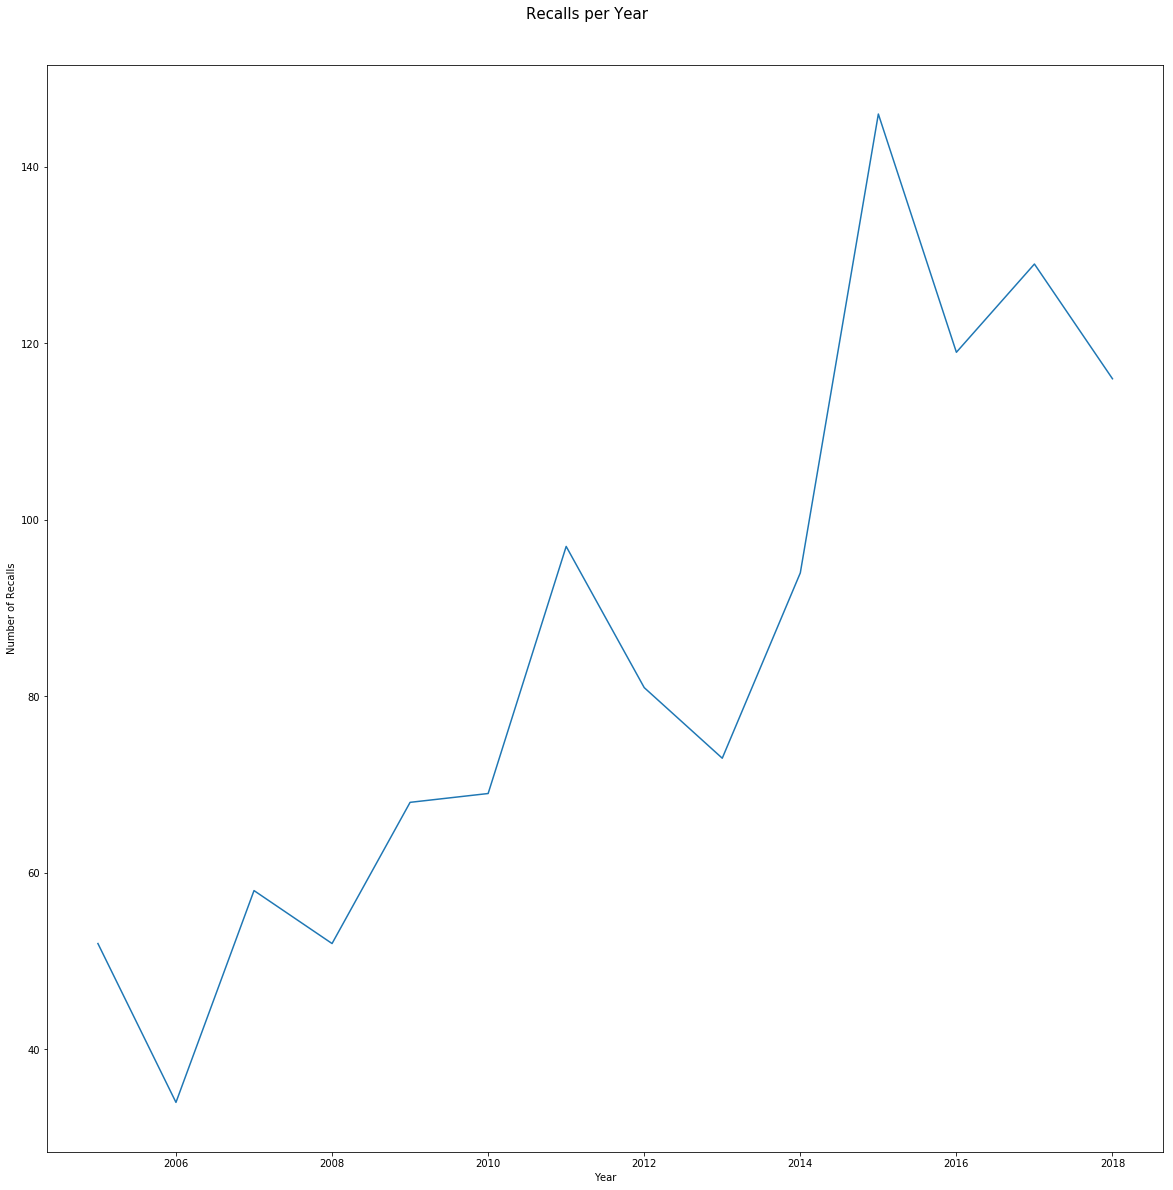

In [10]:
fig = plt.figure(figsize=(20,20))
df = recalls.groupby('Year')['Month'].count().reset_index()
df.columns = ['Year', 'Counts']
plt.plot(df['Year'], df['Counts'])
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.suptitle('Recalls per Year', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Recalls per Year by Pounds')

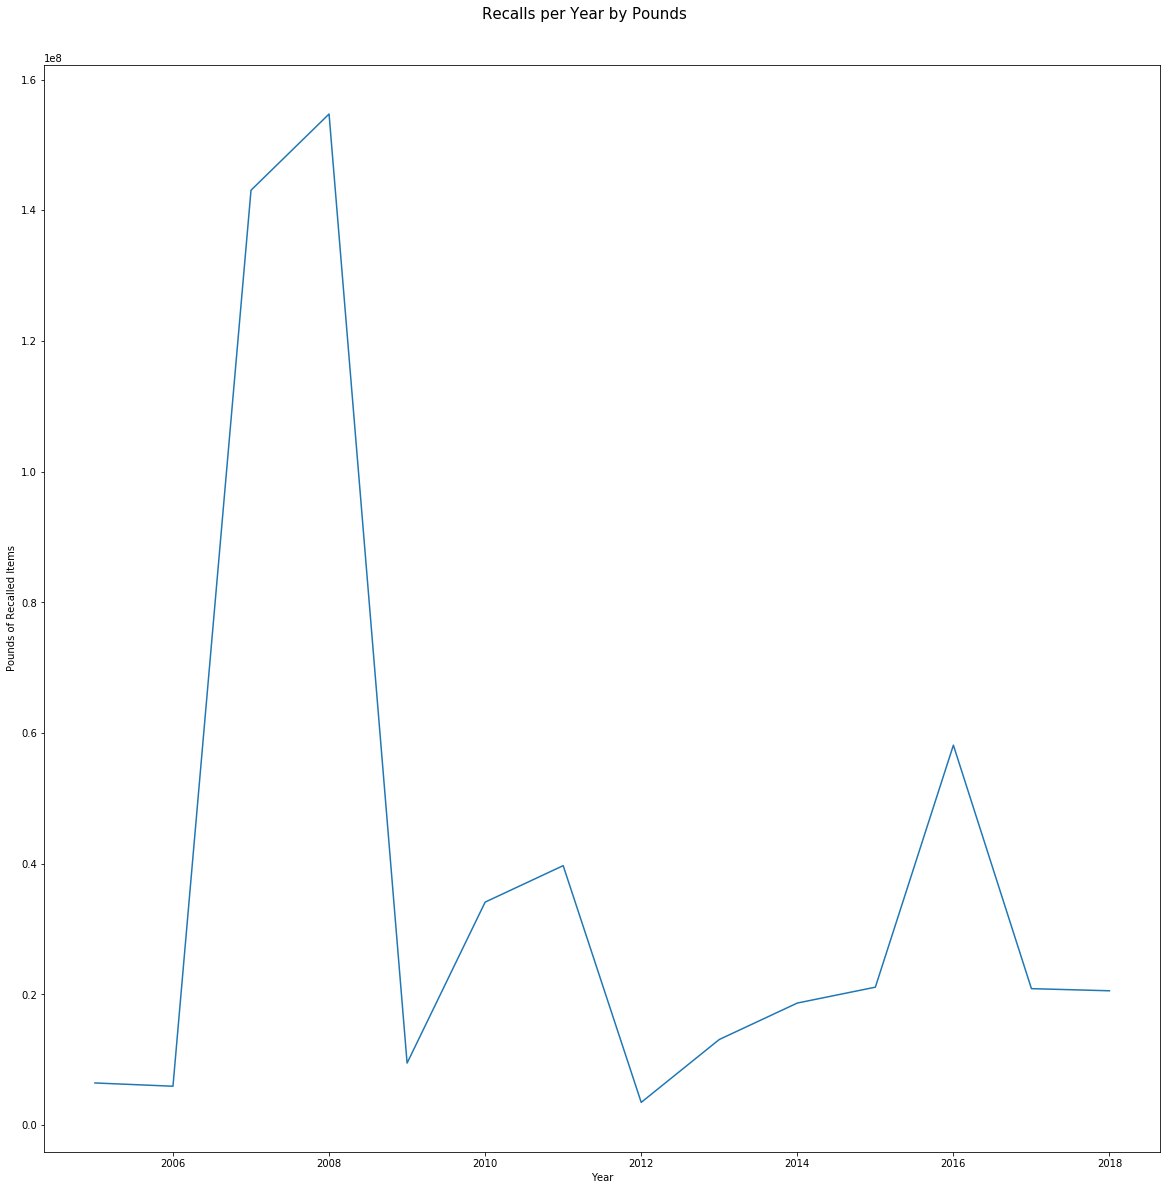

In [11]:
fig = plt.figure(figsize=(20,20))
df = recall_totals
df.columns = ['Year', 'Total Recalls','Pounds Recalled']
plt.plot(df['Year'], df['Pounds Recalled'])
plt.xlabel('Year')
plt.ylabel('Pounds of Recalled Items')
plt.suptitle('Recalls per Year by Pounds', fontsize=15, y=0.92)

In [12]:
#mean number of causualities per reported outbreak
outbreaks['Incidents'].mean()

20.137138194211108

In [13]:
#max outbreaks according to individual states or per reported outbreak
outbreaks.max()

index          20853
Year            2017
Month             12
State        Wyoming
Incidents       1939
dtype: object

In [14]:
#min outbreaks according to individual states or per reported outbreak
outbreaks.min()

index              0
Year            1998
Month              1
State        Alabama
Incidents          2
dtype: object

In [15]:
outbreaks['Incidents'].var()

2528.4905528119366

In [16]:
recalls['Pounds Recalled'].mean()

462477.8240740741

In [17]:
#max recalls according to individual states or per reported outbreak
recalls['Pounds Recalled'].max()

143383823

In [18]:
#min recalls according to individual states or per reported outbreak
recalls['Pounds Recalled'].min()

0

In [19]:
recalls['Pounds Recalled'].var()

27627058989468.582

As we can see in the data above, the number of outbreaks decreased between 1997 and 2017; and the number of recalls increased between 2005 and 2018. A notable observation is that the number of pounds of recalled items does not correlate to the number of recalls - the pounds of recalled items did not increase as the number of recalls increased.

### Relationship Between Recall/Outbreak and Year
First, I will explore the relationship between the number of recalls and the year; and number of outbreaks and the year. While above we can see the linear relationship, we can use data analysis to prove the relationship.

In [22]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [23]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(recall_totals['Year'], recall_totals['Total Recalls'])

In [24]:
slope_recall, intercept_recall, predictions_recall, residuals_recall = evaluate_linear_relationship(recall_totals['Year'], recall_totals['Total Recalls'])

Text(0.5, 0.92, 'Number of Recalls Over Time')

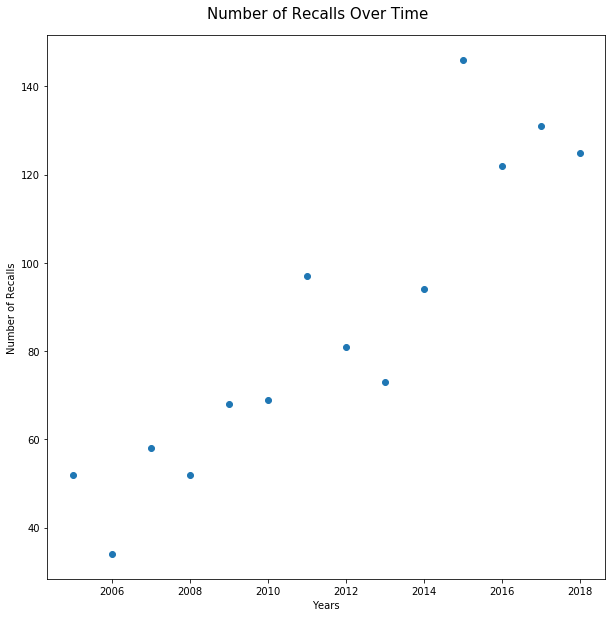

In [25]:
amount = recall_totals['Total Recalls']
recall = recall_totals['Year'] 
fig = plt.figure(figsize=(10,10))
plt.scatter(recall, amount)
plt.xlabel('Years')
plt.ylabel('Number of Recalls')
fig.suptitle('Number of Recalls Over Time', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Number of Outbreaks Over Time')

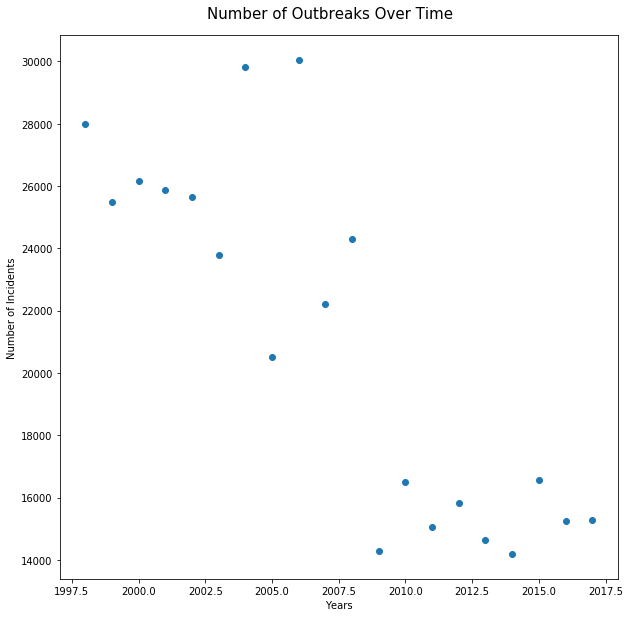

In [26]:
amount = outbreak_totals['Incidents']
outbreak = outbreak_totals['Year']
fig = plt.figure(figsize=(10,10))
plt.scatter(outbreak, amount)
plt.xlabel('Years')
plt.ylabel('Number of Incidents')
fig.suptitle('Number of Outbreaks Over Time', fontsize=15, y=0.92)

Above, we can can see that the relationship between the years and both recall and outbreak are quite linear.

Text(0.5, 0.92, 'Number of Recalls Over Time')

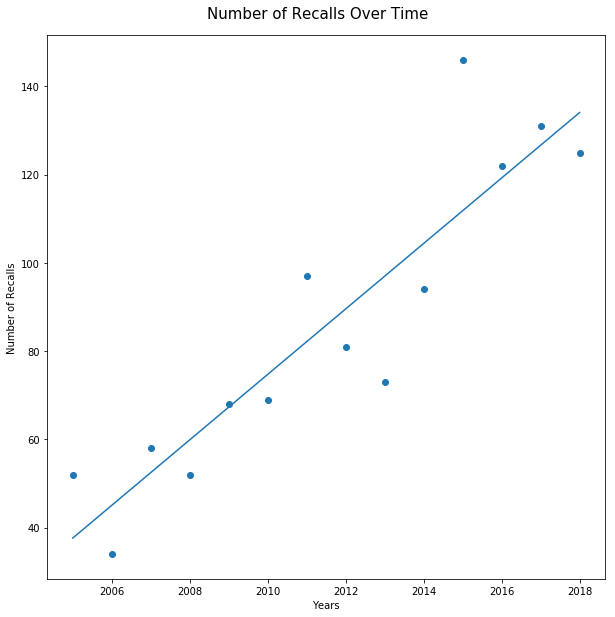

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(recall_totals['Year'], recall_totals['Total Recalls'])
sorted_order = np.argsort(recall_totals['Year'])
plt.plot(recall_totals['Year'][sorted_order], predictions_recall[sorted_order])
plt.xlabel('Years')
plt.ylabel('Number of Recalls')
fig.suptitle('Number of Recalls Over Time', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

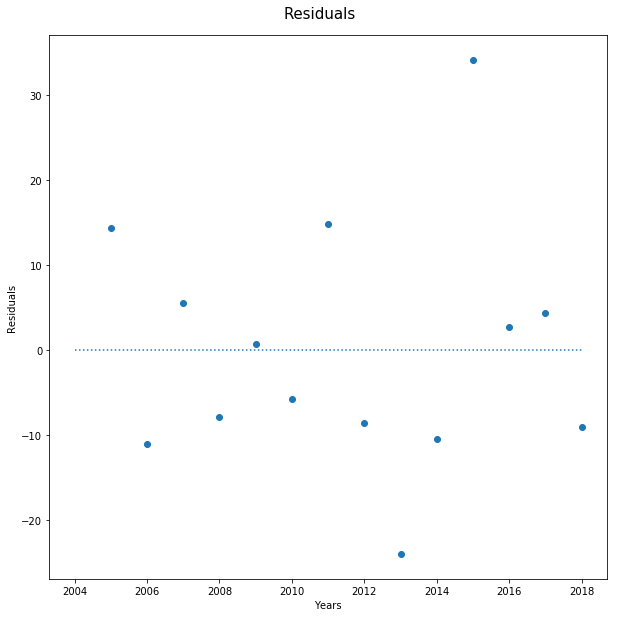

In [28]:
fig = plt.figure(figsize=(10,10))
plt.scatter(recall_totals['Year'], residuals_recall)
plt.plot([2004, recall_totals['Year'][len(recall_totals) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [29]:
np.var(predictions) / np.var(recall_totals['Total Recalls'])

0.8221625255722523

In [30]:
slope_outbreak, intercept_outbreak, predictions_outbreak, residuals_outbreak = evaluate_linear_relationship(outbreak_totals['Year'], outbreak_totals['Incidents'])

Text(0.5, 0.92, 'Number of Outbreak Over Time')

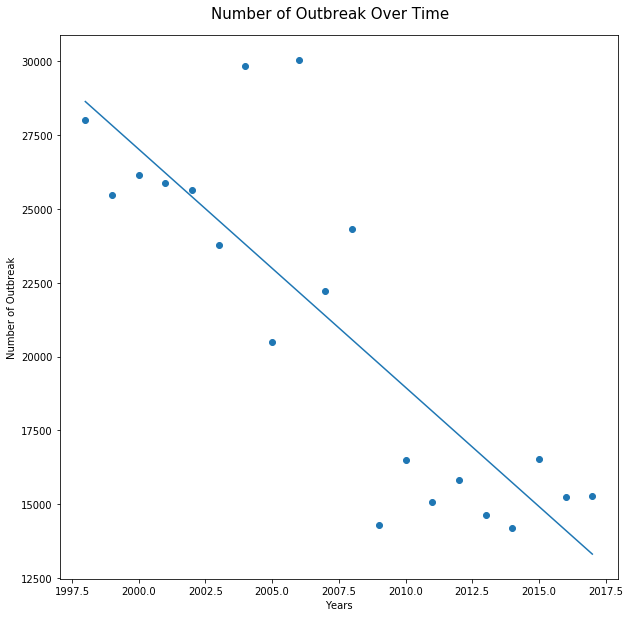

In [31]:
fig = plt.figure(figsize=(10,10))
plt.scatter(outbreak_totals['Year'], outbreak_totals['Incidents'])
sorted_order = np.argsort(outbreak_totals['Year'])
plt.plot(outbreak_totals['Year'][sorted_order], predictions_outbreak[sorted_order])
plt.xlabel('Years')
plt.ylabel('Number of Outbreak')
fig.suptitle('Number of Outbreak Over Time', fontsize=15, y=0.92)

In [32]:
np.var(predictions) / np.var(outbreak_totals['Incidents'])

2.880520757814686e-05

Text(0.5, 0.92, 'Residuals')

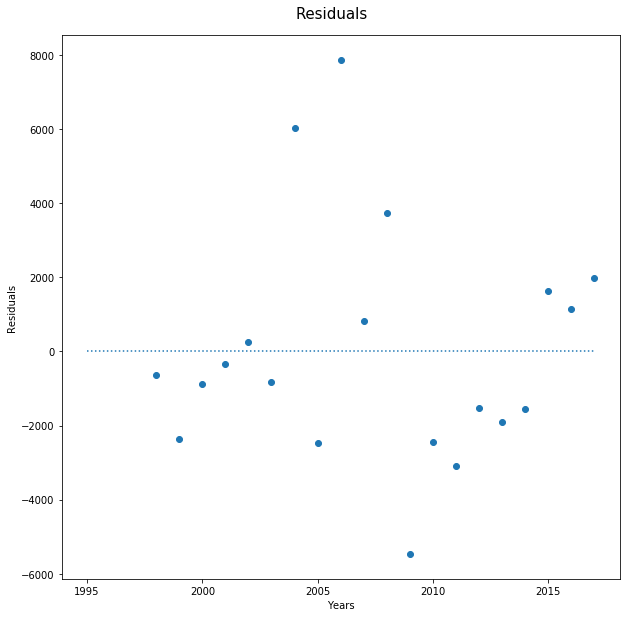

In [33]:
fig = plt.figure(figsize=(10,10))
plt.scatter(outbreak_totals['Year'], residuals_outbreak)
plt.plot([1995, outbreak_totals['Year'][len(outbreak_totals) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The residuals graph also looks pretty random and not skewed for the recall and outbreak data. So we don't need to transform the data.

Both the recall and outbreak graphs look heteroskedastic and the R0squared values are high, above 80%. So we can observe that there is a strong linear relationship between recall vs year and outbreak vs year.

## A Side Exploratory Anaysis

In [ ]:
recall_type = recalls.groupby("Problem Type")['Year'].count()
recall_type

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.barh(['Chemical Contamination',"E. coli","Extraneous Material",'Listeria monocytogenes','Misbranding','Other','Processing Defect','Residue','Salmonella','Unapproved Substance','Undeclared Allergen','Undeclared Substance'], [4,144,136,173,6,212,45,8,44,5,368,43]);
plt.xlabel("Number of Recall")
plt.ylabel("Cause of Recalls")
fig.suptitle("Number of Recalls per Cause", fontsize=15, y=0.92)

On a little side data, we can see that there is a high number of recalls that are due to an undeclared allergen. This is quite interesting because there is a big concern over salmonella and E. coli, and these are the most reported recalls, yet the most common cause of a recall is due to mislabeling of a product.

## Relationship Between Recall and Outbreak Results
Now, I will explore the relationship between the number of recalls and outbreaks by year.

In [34]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(merged_totals['Total Recalls'], merged_totals['Total Incidents'])

Text(0.5, 0.92, 'Number of Recalls and Outbreaks Between 2005 and 2017')

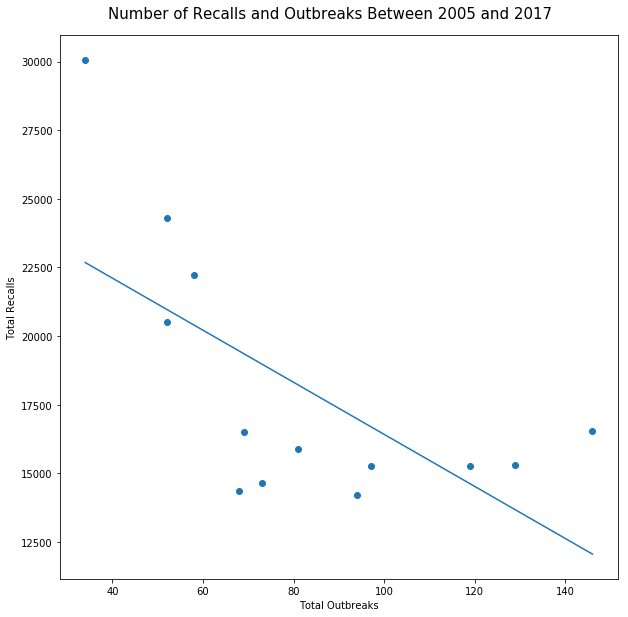

In [38]:
fig = plt.figure(figsize=(10,10))
plt.scatter(merged_totals['Total Recalls'], merged_totals['Total Incidents'])
sorted_order = np.argsort(merged_totals['Total Recalls'])
plt.plot(merged_totals['Total Recalls'][sorted_order], predictions[sorted_order])
plt.ylabel("Total Recalls")
plt.xlabel("Total Outbreaks")
fig.suptitle("Number of Recalls and Outbreaks Between 2005 and 2017", fontsize=15, y=0.92)

In [36]:
#R-Squared Value
np.var(predictions) / np.var(merged_totals['Total Incidents'])

0.42418185324879343

Text(0.5, 0.92, 'Residuals')

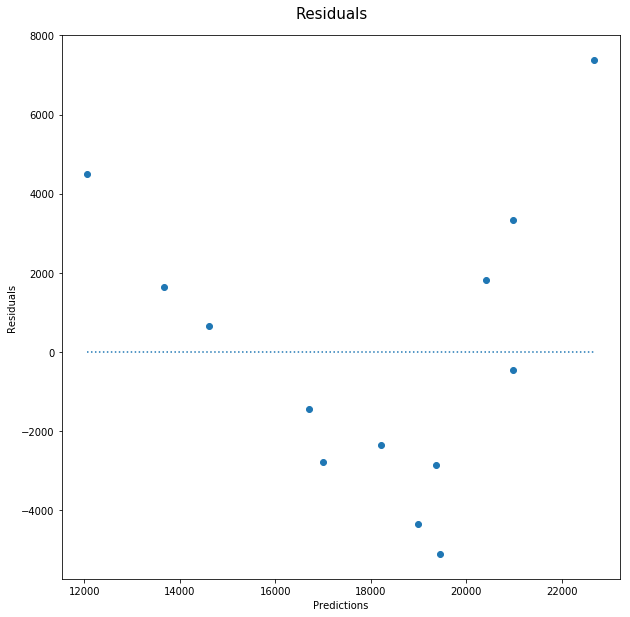

In [37]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The residual graph looks fairly random, however, it is difficult to fully conclude that when there is not many data points to observe. Similarly for the relationship graph between recalls and outbreaks, the graph looks fairly linear but the outlier may affect the data when there are very few data points.

From the R-squared value - 42% - it is not reliable to say that there is a strong relationship between the number of recalls and the number of outbreaks. So this means we cannot reject the null hypothesis. Therefore, we cannot accept our hypothesis: a higher number of food recalls lead to a lower number of food-related outbreaks.

## Conclusion
In conclusion, we can see that there is a relationship or correlation between food recalls and outbreaks in the United States: the number of food recalls have increased through the years while the number of food-related outbreaks have decreased. While it is tempting to say that there is causality between the two variables, the data analysis above demonstrates that it isn't the case. Although it may be due to too few data points, the data shows there is not a strong relationship between the number of recalls and outbreaks in the United States. Instead it is very plausible that other factors influenced the decrease of food-relate outbreaks such as stricter food laws and better healthcare.